# Linear Regression

Add cells for your answers as needed after each question.

1. Create a sample dataset $\{ (x^{(i)},y^{(i)}) \}$  of 1000 examples where
    * $x$ and $y$ are approximately linearly dependent. You may pick the parameters $w,b$ as you like.
    * $y - (w x+b)$ is normal distributed.
    
Plot $x$ vs $y$ and histogram $y - (w x+b)$.
   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def generate_approx_linear_data(N=1000, w=2., b=3., s=0.5, min_x=-1., max_x=2.):
    x=(max_x-min_x)*np.random.random(N)+min_x
    return x, np.random.normal(0.,s,N)+ w*x+b

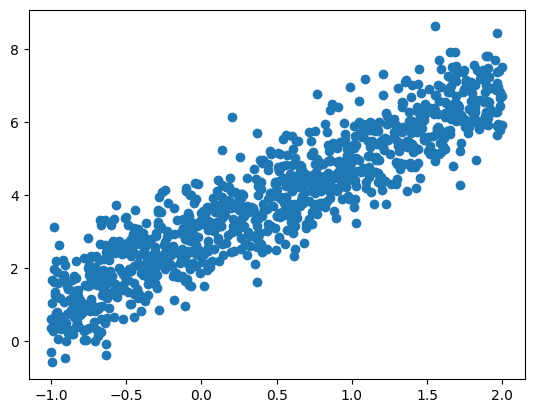

In [3]:
plt.scatter(*generate_approx_linear_data(s=0.75))

2. Create functions `model_loop(x,w,b)` and `model_np(x,w,b)` that compute $y=wx+b$, the first using explicit loops, the second computing using numpy and no loops. Illustrate that the two functions create identical output. Use numpy version for the remainder of the lab.

In [4]:
def model_loop(x, w, b):
    y = [0]*len(x)
    for i in range(len(x)):
        y[i] = w*x[i] + b
    return y

In [5]:
def model_np(x, w, b):
    return w*x + b

In [6]:
x = np.array([3, 8, 10, 14, 19])
w = 2.0
b = 3.0

y_loop = model_loop(x, w, b)
y_np = model_np(x, w, b)

print("y_loop:", y_loop)
print("y_np:", y_np)

y_loop: [9.0, 19.0, 23.0, 31.0, 41.0]
y_np: [ 9. 19. 23. 31. 41.]


3. Plot $x$ vs $y$ and compare to $x$ vs. $wx+b$ for the parameters from exercise 1.

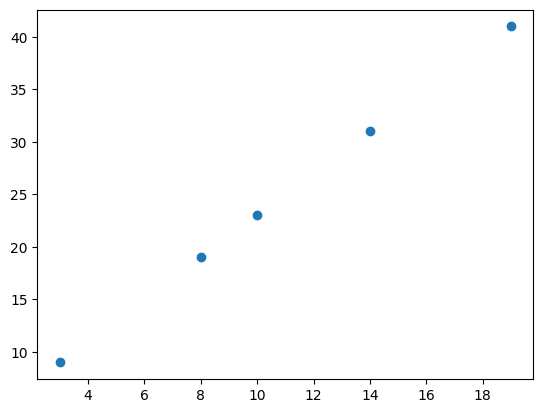

In [7]:
plt.scatter(x, y_loop, label='x vs y')

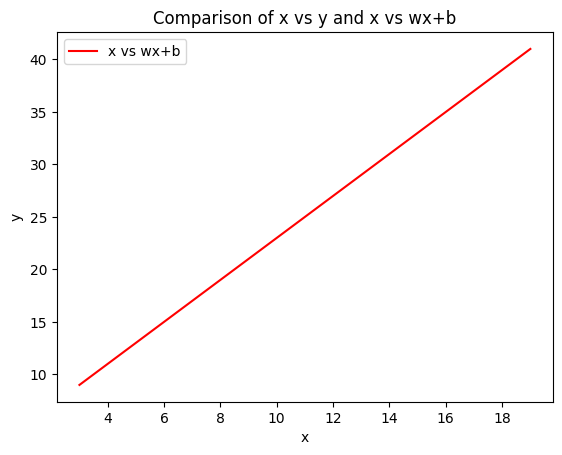

In [8]:
wx_b = model_np(x, w=2., b=3.)
plt.plot(x, wx_b, label='x vs wx+b', color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of x vs y and x vs wx+b')
plt.legend()
plt.show()

4. Create a function `cost(x,y,w,b)` that computes the mean square error between model prediction and data. Use numpy expressions and do not do any explicit loops in python. Make 2 plots illusrating the parabolic shape of the cost function:
   * Plot the cost vs $w$ for the dataset, holding $b$ constant.
   * Plot the cost vs $b$ for the dataset, holding $w$ constant.


In [9]:
def cost(x, y, w, b):
    y_pred = w*x + b
    mse = np.mean((y - y_pred)**2)
    return mse

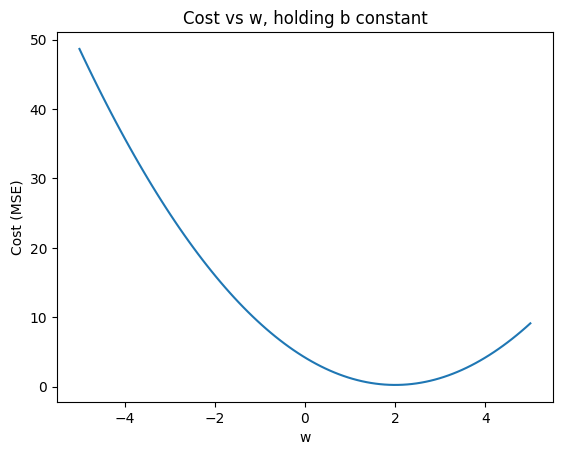

In [10]:
# Cost vs  w  for the dataset, holding  b  constant

w_values = np.linspace(-5, 5, 100)
b = 3.0
x, y = generate_approx_linear_data(N=1000, w=2., b=3., s=0.5, min_x=-1, max_x=2.)
cost_values = [cost(x, y, w, b) for w in w_values]

plt.plot(w_values, cost_values)
plt.xlabel('w')
plt.ylabel('Cost (MSE)')
plt.title('Cost vs w, holding b constant')
plt.show()

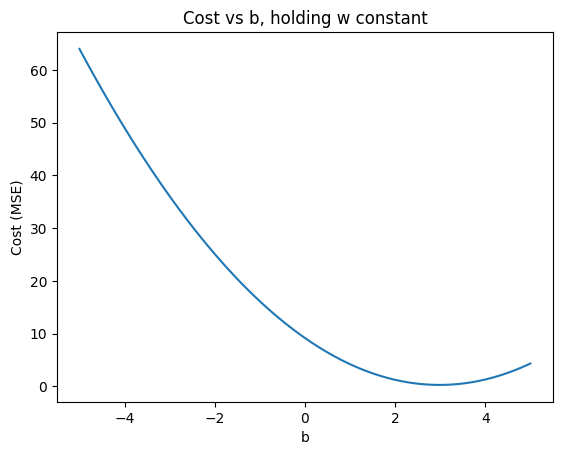

In [11]:
# Cost vs b, holding w constant

b_values = np.linspace(-5, 5, 100)
w_constant = 2.
cost_values = [cost(x, y, w_constant, b) for b in b_values]

plt.plot(b_values, cost_values)
plt.xlabel('b')
plt.ylabel('Cost (MSE)')
plt.title('Cost vs b, holding w constant')
plt.show()

5. Create a function `dj_dw, dj_db = gradient(x, y, w, b)` that computes the gradient wrt $w$ and $b$ on a dataset. Use numpy expressions and do not do any explicit loops in python. Make 2 plots that illustrates that the gradient is 0 at the optimal values of $w$ and $b$ by:
   * Ploting the gradient vs $w$ for the dataset, holding $b$ constant.
   * Ploting the gradient vs $b$ for the dataset, holding $w$ constant.

In [12]:
def gradient(x, y, w, b):
    dj_dw = -2 * np.mean(x * (y - (w * x + b)))
    dj_db = -2 * np.mean(y - (w * x + b))
    return dj_dw, dj_db

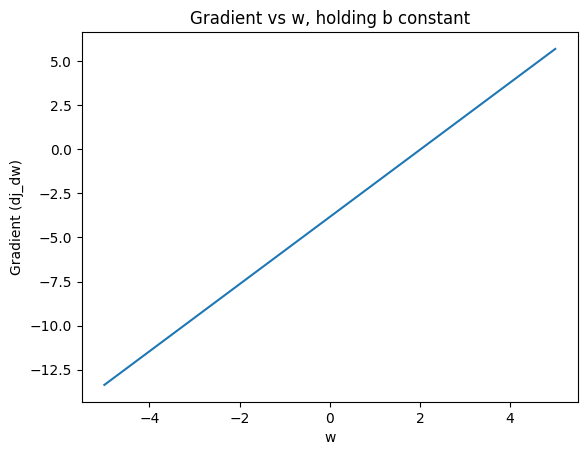

In [13]:
x, y = generate_approx_linear_data(N=1000, w=2., b=3., s=0.5, min_x=-1, max_x=2.)

w_values = np.linspace(-5, 5, 100)
b_constant = 3.
gradient_values_w = [gradient(x, y, w, b_constant)[0] for w in w_values]

plt.plot(w_values, gradient_values_w)
plt.xlabel('w')
plt.ylabel('Gradient (dj_dw)')
plt.title('Gradient vs w, holding b constant')
plt.show()

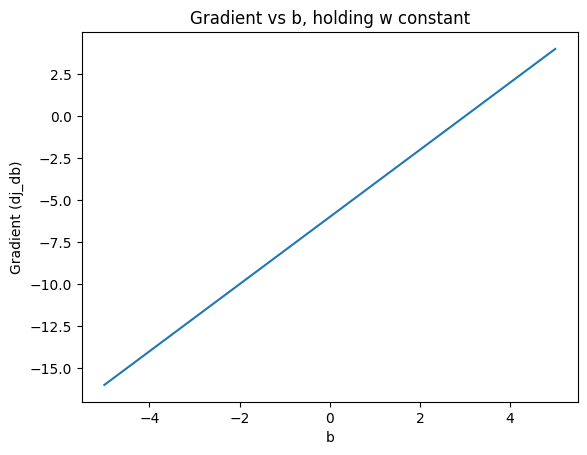

In [14]:
b_values = np.linspace(-5, 5, 100)
w_constant = 2.
gradient_values_b = [gradient(x, y, w_constant, b)[1] for b in b_values]

plt.plot(b_values, gradient_values_b)
plt.xlabel('b')
plt.ylabel('Gradient (dj_db)')
plt.title('Gradient vs b, holding w constant')
plt.show()

6. Use the following `gradient_descent` function to "fit" a line to the data.  Make sure you do not start at the optimal values from exercise 1. You may have to try different values of `alpha`.

In [22]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient):
    w = copy.deepcopy(w_in)

    J_history = []
    p_history = []

    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w , b)

        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        if i<100000:
            J_history.append( cost(x, y, w , b))
            p_history.append([w,b])

        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history

In [25]:
import copy
import math

In [26]:
# Initialize the parameters
w_in = 0.
b_in = 0.
alpha = 0.01
num_iters = 100000

In [27]:
w_fit, b_fit, J_history, p_history = gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient)


Iteration    0: Cost 1.76e+01  dj_dw: -6.564e+00, dj_db: -7.832e+00   w:  6.564e-02, b: 7.83245e-02
Iteration 10000: Cost 2.66e-01  dj_dw:  2.209e-14, dj_db: -2.168e-14   w:  2.011e+00, b: 3.00124e+00
Iteration 20000: Cost 2.66e-01  dj_dw:  2.209e-14, dj_db: -2.168e-14   w:  2.011e+00, b: 3.00124e+00
Iteration 30000: Cost 2.66e-01  dj_dw:  2.209e-14, dj_db: -2.168e-14   w:  2.011e+00, b: 3.00124e+00
Iteration 40000: Cost 2.66e-01  dj_dw:  2.209e-14, dj_db: -2.168e-14   w:  2.011e+00, b: 3.00124e+00
Iteration 50000: Cost 2.66e-01  dj_dw:  2.209e-14, dj_db: -2.168e-14   w:  2.011e+00, b: 3.00124e+00
Iteration 60000: Cost 2.66e-01  dj_dw:  2.209e-14, dj_db: -2.168e-14   w:  2.011e+00, b: 3.00124e+00
Iteration 70000: Cost 2.66e-01  dj_dw:  2.209e-14, dj_db: -2.168e-14   w:  2.011e+00, b: 3.00124e+00
Iteration 80000: Cost 2.66e-01  dj_dw:  2.209e-14, dj_db: -2.168e-14   w:  2.011e+00, b: 3.00124e+00
Iteration 90000: Cost 2.66e-01  dj_dw:  2.209e-14, dj_db: -2.168e-14   w:  2.011e+00, b: 3.0

In [28]:
print(f"Optimal parameters: w = {w_fit:0.3e}, b = {b_fit:0.5e}")
print(f"Final cost: {J_history[-1]:0.2e}")

Optimal parameters: w = 2.011e+00, b = 3.00124e+00
Final cost: 2.66e-01


7. Plot the cost and parameters versus iteration of gradient descent.

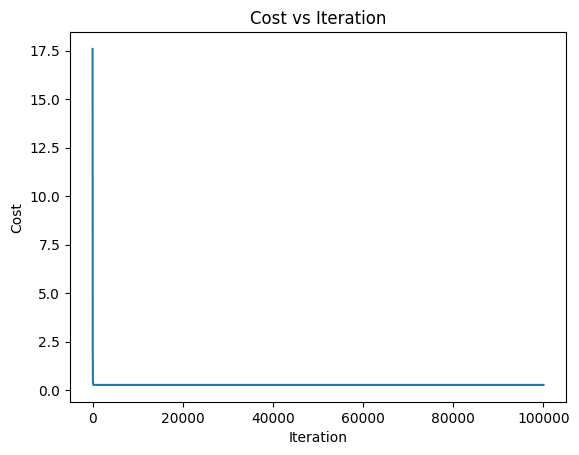

In [29]:
plt.plot(range(len(J_history)), J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.show()

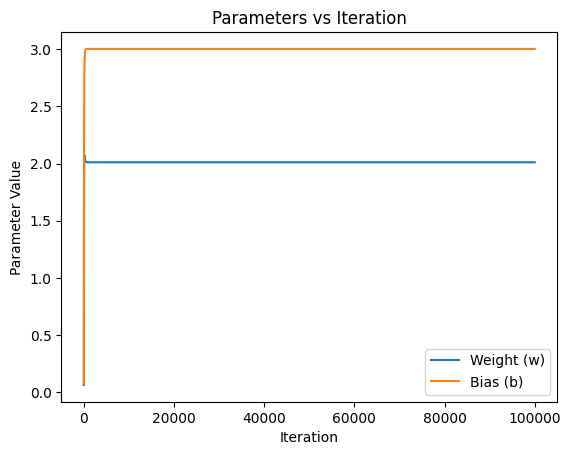

In [30]:
plt.plot(range(len(p_history)), [p[0] for p in p_history], label='Weight (w)')
plt.plot(range(len(p_history)), [p[1] for p in p_history], label='Bias (b)')
plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.title('Parameters vs Iteration')
plt.legend()
plt.show()